In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [3]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

138.430997671 60.8595704834 (112, 92)


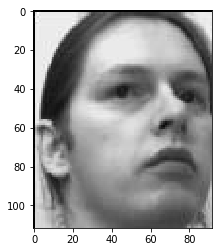

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

im = Image.open("image/umist_cropped.jpg")
data_orig = np.array(im)
# print(data_orig.shape)
# print(np.mean(data_orig), np.std(data_orig))

ws = (112,92)
data = data_orig[ws[0]:2*ws[0],ws[1]:ws[1]*2]
print(np.mean(data), np.std(data), data.shape)
plt.imshow(data, cmap='gray')
plt.show()

In [19]:
# Hyperparamters
X = data

W = X.shape[0]
K = X.shape[1]
shape = (W, K)
I = 20
T_shape = (W, I)
V_shape = (I, K)

In [27]:
# Gibbs Sampler
print(np.mean(X), np.std(X))

# Initialization

# mean = gamma_scale * gamma_shape
# variance = gamma_scale * gamma_shape^2

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5
print(data_mean, data_variance)

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale
print(gamma_scale, gamma_shape)

A_t = np.ones(T_shape)*gamma_shape
B_t = np.ones(T_shape)*gamma_scale
A_v = np.ones(V_shape)*gamma_shape
B_v = np.ones(V_shape)*gamma_scale

T = np.random.gamma(A_t,B_t)
V = np.random.gamma(A_v,B_v)
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

mean_diff = np.mean(np.abs(X - np.dot(T,V)))
print("Random loss: ", mean_diff)

138.430997671 60.8595704834
2.76861995342 9.25971829856
3.34452487317 0.827806656672
151.746477463 61.9959536703
Random loss:  68.7921946908


In [32]:
# Loop
max_iter = 1000
for n in range(max_iter):
    
    p = np.zeros((W, I ,K))
    S = np.zeros((W, I ,K))
    
    for v in range(W):
        for t in range(K):
#             print(T.shape, V.shape, p.shape, t,v)
            p[v, :, t] = ((T[[v],:]*V[:, [t]].transpose())/
                         np.dot(T[[v],:],V[:, [t]]))
            S[v, :, t] = np.random.multinomial(X[v,t], p[v, :, t].squeeze())
    
    sigma_t = np.sum(S, axis=2)
    sigma_v = np.sum(S, axis=0)
    
#     print(T.shape, V.shape, W, K)
    
    alpha_t = A_t + sigma_t
    beta_t = 1./(A_t/B_t + 
                 np.dot(np.ones((W,1)), 
                        np.dot(V, np.ones((K,1))).T))
    
    alpha_v = A_v + sigma_v
    beta_v = 1./(A_v/B_v + 
                 np.dot(np.dot(np.ones((W,1)).T, T).T,
                        np.ones((K,1)).T))

    T = np.random.gamma(alpha_t, beta_t)
    V = np.random.gamma(alpha_v, beta_v)
    
    if n % 50 == 0:
        mean_diff = np.mean(np.abs(X - np.dot(T,V)))
        print("epoch %d: loss: "%n, mean_diff)

epoch 0: loss:  11.3813200565
epoch 50: loss:  11.5378762005
epoch 100: loss:  10.6589076658
epoch 150: loss:  10.1563347352
epoch 200: loss:  10.1482979466
epoch 250: loss:  9.32702375756
epoch 300: loss:  9.71000675738
epoch 350: loss:  9.082037948
epoch 400: loss:  8.60313067481
epoch 450: loss:  8.18959677424
epoch 500: loss:  7.83738915503
epoch 550: loss:  8.03609864751
epoch 600: loss:  9.24591455241
epoch 650: loss:  8.42130654716
epoch 700: loss:  8.62353985198
epoch 750: loss:  8.6074450046
epoch 800: loss:  9.30947012025
epoch 850: loss:  9.62793429134
epoch 900: loss:  8.70339767253
epoch 950: loss:  8.3248275253


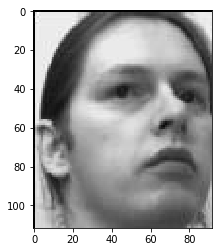

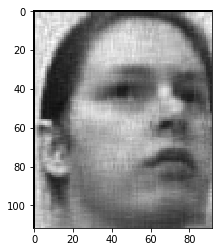

In [31]:
# print(X)
# print(np.dot(T,V))

plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

In [15]:
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

138.430997671 60.8595704834
150.580075859 65.1469140966
